In [11]:
!pip install scanpy

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

Cell 1: Load the Processed Data

First, load the cleaned and normalized AnnData object that we saved at the end of the last notebook.

In [5]:
import scanpy as sc

# Load the processed data from the previous notebook
adata = sc.read('pbmc3k_processed.h5ad')

print("✅ Processed data loaded successfully.")
print(adata)

✅ Processed data loaded successfully.
AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'


Cell 2: Run Principal Component Analysis (PCA)

PCA is a linear technique that reduces the data's dimensionality while preserving as much of the variation as possible. We run this on the highly variable genes we identified earlier.



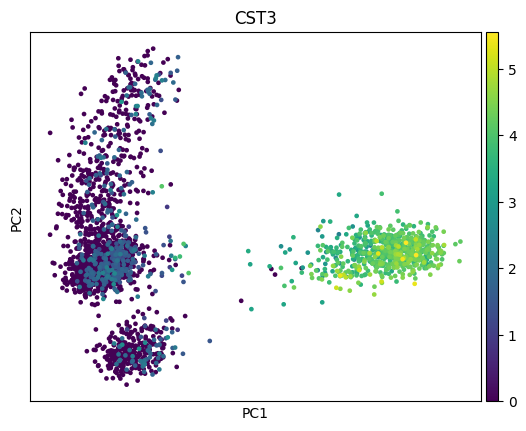

In [6]:
# Run PCA
# We use svd_solver='arpack' which is efficient for large sparse matrices.
sc.tl.pca(adata, svd_solver='arpack')

# Plot the PCA results to see the contributions of each principal component
sc.pl.pca(adata, color='CST3')

This initial plot shows the cells projected onto the first two principal components. We can color it by a known marker gene (like CST3 for monocytes) to see if the major axes of variation separate known cell types.

Cell 3: The Elbow Plot (Choosing the Number of PCs)

To decide how many principal components (PCs) to use for downstream analysis, we'll create an "elbow plot." This shows the amount of variance explained by each PC. We want to choose enough PCs to capture the main biological signal without including noise.

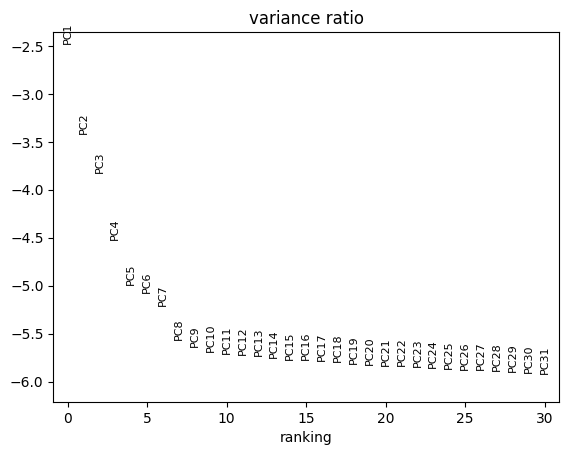

In [7]:
# Create the elbow plot
sc.pl.pca_variance_ratio(adata, log=True)

Look for the "elbow" in the curve. This is the point where adding more PCs provides diminishing returns (i.e., explains very little additional variance). Based on this plot, using the top 20 PCs seems like a reasonable choice to capture the majority of the signal.

Cell 4: Compute the Neighborhood Graph

This is a crucial step. Based on the PCA representation of the data (using our chosen 20 PCs), we will now compute a neighborhood graph. This graph connects each cell to its 'k' nearest neighbors in the high-dimensional space. This graph is the foundation for both UMAP visualization and clustering.

In [8]:
# Compute the neighborhood graph using 20 PCs
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

print("✅ Neighborhood graph computed.")

✅ Neighborhood graph computed.


Cell 5: Run UMAP for Visualization

Now, we'll use UMAP to take the neighborhood graph and create a visually appealing 2D embedding. UMAP is a powerful algorithm that excels at preserving both the local and global structure of the data.



In [9]:
# Run UMAP
sc.tl.umap(adata)

print("✅ UMAP embedding computed.")

✅ UMAP embedding computed.


Cell 6: The "Galaxy Plot"

This is the moment we've been working towards! Let's plot the UMAP results. You should see distinct "islands" or continents of cells, which represent potential cell types.

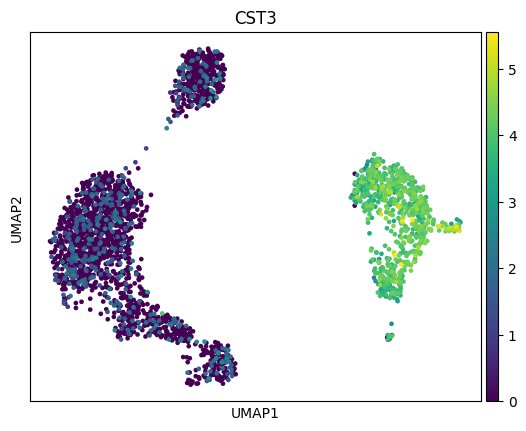

In [10]:
# Plot the UMAP embedding
# We can again color it by a gene to see how its expression is distributed across the map.
sc.pl.umap(adata, color='CST3')

Look at that! We have a beautiful "galaxy" plot where each dot is a single cell. The structure is clear, even without formal clustering. The right side of the map shows high expression of CST3, indicating that's likely where the monocytes are.

Cell 7: Save the Results

Let's save the AnnData object, which now contains the PCA, neighborhood graph, and UMAP information.



In [12]:
# Save the results
adata.write('pbmc3k_dim_reduced.h5ad')

print("✅ Dimensionality reduction complete. AnnData object saved.")

✅ Dimensionality reduction complete. AnnData object saved.
